<a href="https://colab.research.google.com/github/Sdolskin/learning-classes/blob/Trained_models/TF2_0_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import itertools
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix


print(tf.__version__)

2.12.0


In [2]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

# Get list of available functions and attributes
#func_list = dir(fashion_mnist)

# Count the number of functions in the list
#num_funcs = len([func for func in func_list if callable(getattr(fashion_mnist, func))])

# Print the number of functions
#print("Number of functions in Fashion MNIST dataset:", num_funcs)



# Load the data and labels
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Train images shape:", x_train.shape)
print("Train labels shape:", y_train.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [3]:
# The load data is only 2D!
# Convolution expects height x width x color

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Number of classes
K = len(set(y_train))

print("Number of Classes:", K)

Number of Classes: 10


In [4]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [5]:
# Compile and fit
# NOTE: make shure you're using the GPU for this!
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.5514 - accuracy: 0.8077 - val_loss: 0.4603 - val_accuracy: 0.8277
Epoch 2/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3941 - accuracy: 0.8540 - val_loss: 0.4009 - val_accuracy: 0.8563
Epoch 3/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3619 - accuracy: 0.8655 - val_loss: 0.3656 - val_accuracy: 0.8676
Epoch 4/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3390 - accuracy: 0.8741 - val_loss: 0.3589 - val_accuracy: 0.8658
Epoch 5/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3171 - accuracy: 0.8806 - val_loss: 0.3630 - val_accuracy: 0.8728
Epoch 6/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3038 - accuracy: 0.8860 - val_loss: 0.3723 - val_accuracy: 0.8687
Epoch 7/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2944 - accuracy: 0.8901 - val_loss: 0.3579 -

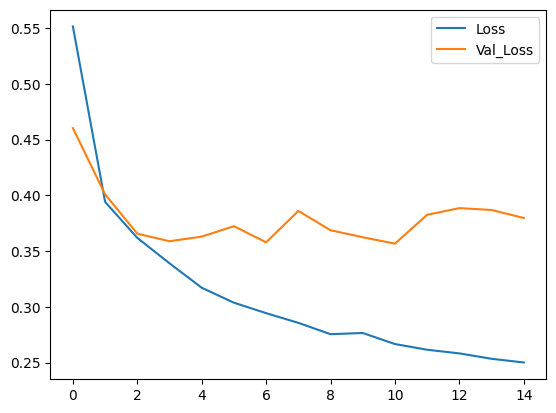

In [7]:
# Plot Loss per iteration
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()

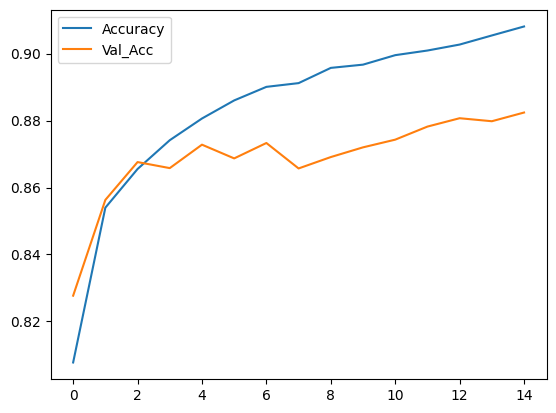

In [8]:
# Plot Accuracy per iteration
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Acc')
plt.legend()

313/313 [==============================] - 2s 5ms/step
Confusion Matrix, without normalization
[[857   1  23  15   1   1  97   0   5   0]
 [  5 967   1  19   1   0   6   0   1   0]
 [ 15   0 804  13  77   0  90   0   1   0]
 [ 23   5  16 890  27   0  32   0   5   2]
 [  0   0  70  30 836   0  59   0   5   0]
 [  0   0   1   0   0 973   1  16   2   7]
 [131   0  74  31 135   0 615   0  14   0]
 [  0   0   0   0   0  18   0 958   0  24]
 [  2   2   5   2   2   3   8   3 973   0]
 [  0   0   0   0   0  11   0  38   0 951]]


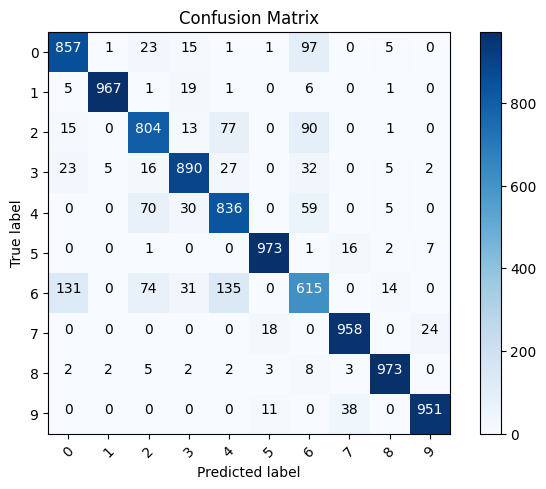

In [9]:
# Plot confusion Matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=true'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print('Confusion Matrix, without normalization')

  print(cm)

  plt.imshow(cm , interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color='white' if cm[i, j] > thresh else "black")
      
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

  
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

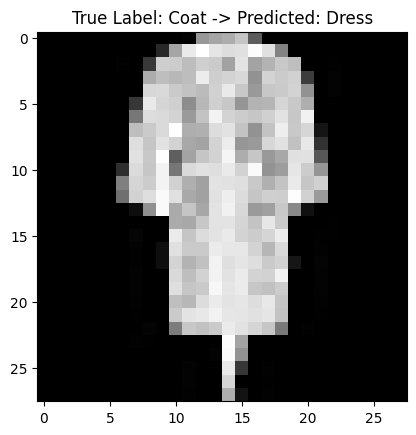

In [18]:
# Label Mapping 

labels = '''T-shirt/top
  Trousser
  Pullover
  Dress
  Coat
  Sandal
  Shirt
  Sneaker
  Bad
  Ankle boot'''.split()

# Show some misclassified expamples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True Label: %s -> Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [19]:
# SAVING this into in a FILE Path
model.save('TF2.0_Fashion_MNIST.h5')

In [20]:
# Checking if the file exists
!ls -1h

sample_data
TF2.0_Fashion_MNIST.h5
